In [ ]:
!pip install numpy
!pip install matplotlib
!pip install random

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


SNR in dB: 0
Numbder of errors: 23340
Error probability: 0.0778
SNR in dB: 1
Numbder of errors: 17157
Error probability: 0.05719
SNR in dB: 2
Numbder of errors: 11191
Error probability: 0.037303333333333334
SNR in dB: 3
Numbder of errors: 6814
Error probability: 0.022713333333333332
SNR in dB: 4
Numbder of errors: 3801
Error probability: 0.01267
SNR in dB: 5
Numbder of errors: 1800
Error probability: 0.006
SNR in dB: 6
Numbder of errors: 762
Error probability: 0.00254
SNR in dB: 7
Numbder of errors: 238
Error probability: 0.0007933333333333333
SNR in dB: 8
Numbder of errors: 71
Error probability: 0.00023666666666666665
SNR in dB: 9
Numbder of errors: 8
Error probability: 2.6666666666666667e-05


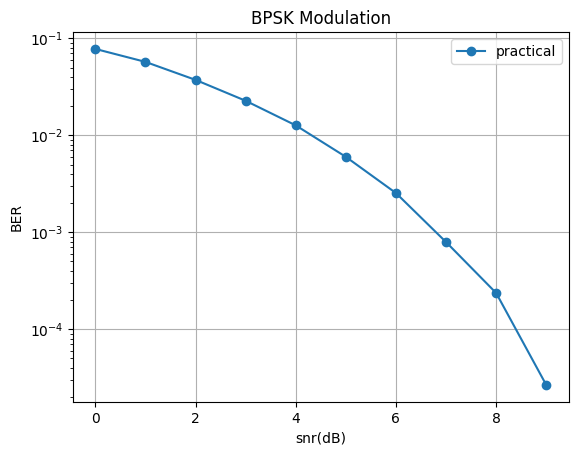

In [ ]:
from numpy import sqrt
import random
import matplotlib.pyplot as plt

N = 300000
snrindB_range = range(0, 10)
itr = len(snrindB_range)
ber = [None] * itr
ber1 = [None] * itr
tx_symbol = 0
noise = 0
ch_coeff = 0
rx_symbol = 0
det_symbol = 0
for n in range(0, itr):

    snrindB = snrindB_range[n]
    snr = 10.0 ** (snrindB / 10.0)
    noise_std = 1 / sqrt(2 * snr)
    noise_mean = 0

    no_errors = 0
    for m in range(0, N):
        tx_symbol = 2 * random.randint(0, 1) - 1
        noise = random.gauss(noise_mean, noise_std)
        rx_symbol = tx_symbol + noise
        det_symbol = 2 * (rx_symbol >= 0) - 1
        no_errors += 1 * (tx_symbol != det_symbol)

    ber[n] = no_errors / N
    print("SNR in dB:", snrindB)
    print("Numbder of errors:", no_errors)
    print("Error probability:", ber[n])
plt.semilogy(snrindB_range, ber, 'o-', label='practical')

plt.xlabel('snr(dB)')
plt.ylabel('BER')
plt.grid(True)
plt.title('BPSK Modulation')
plt.legend()
plt.show()